## EDA on image data before modeling building
* The data comes pre-split into training and test images.  
* Both dataset contain two files, one with the images, and another with the image labels.  

In [1]:
# Import modules

from __future__ import division

import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import functools
from tqdm import tqdm, tqdm_notebook
import keras
import keras.backend as K
from IPython.display import SVG
from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras.callbacks import History 
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [2]:
# Set pandas preferences
pd.options.display.max_columns=500
pd.options.display.max_colwidth=500

In [3]:
# Set the plot style
plt.style.use('ggplot')

# Load data
* We need both training and test sets

In [4]:
train_path = 'Volcanoes_train/'
test_path = 'Volcanoes_test/'

In [143]:
train_images = pd.read_csv(train_path + 'train_images.csv', header=None)

In [144]:
train_images.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,11850,11851,11852,11853,11854,11855,11856,11857,11858,11859,11860,11861,11862,11863,11864,11865,11866,11867,11868,11869,11870,11871,11872,11873,11874,11875,11876,11877,11878,11879,11880,11881,11882,11883,11884,11885,11886,11887,11888,11889,11890,11891,11892,11893,11894,11895,11896,11897,11898,11899,11900,11901,11902,11903,11904,11905,11906,11907,11908,11909,11910,11911,11912,11913,11914,11915,11916,11917,11918,11919,11920,11921,11922,11923,11924,11925,11926,11927,11928,11929,11930,11931,11932,11933,11934,11935,11936,11937,11938,11939,11940,11941,11942,11943,11944,11945,11946,11947,11948,11949,11950,11951,11952,11953,11954,11955,11956,11957,11958,11959,11960,11961,11962,11963,11964,11965,11966,11967,11968,11969,11970,11971,11972,11973,11974,11975,11976,11977,11978,11979,11980,11981,11982,11983,11984,11985,11986,11987,11988,11989,11990,11991,11992,11993,11994,11995,11996,11997,11998,11999,12000,12001,12002,12003,12004,12005,12006,12007,12008,12009,12010,12011,12012,12013,12014,12015,12016,12017,12018,12019,12020,12021,12022,12023,12024,12025,12026,12027,12028,12029,12030,12031,12032,12033,12034,12035,12036,12037,12038,12039,12040,12041,12042,12043,12044,12045,12046,12047,12048,12049,12050,12051,12052,12053,12054,12055,12056,12057,12058,12059,12060,12061,12062,12063,12064,12065,12066,12067,12068,12069,12070,12071,12072,12073,12074,12075,12076,12077,12078,12079,12080,12081,12082,12083,12084,12085,12086,12087,12088,12089,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,95,101,99,103,95,86,96,89,70,104,115,96,89,102,109,108,102,104,95,91,100,99,97,100,107,109,98,98,94,98,102,87,82,94,105,93,102,107,98,105,111,108,94,95,97,108,96,92,89,95,101,94,56,61,90,101,92,101,110,102,104,116,112,95,95,90,110,109,90,97,101,101,92,79,77,96,89,91,97,101,98,89,95,107,113,99,78,93,102,99,98,105,103,107,112,94,79,84,103,104,103,103,114,125,111,95,99,87,90,93,77,75,84,104,100,90,99,93,79,101,99,86,76,80,87,98,108,95,72,91,98,82,97,104,102,99,91,86,101,99,97,91,95,93,103,104,104,96,106,112,108,106,105,107,112,109,100,96,90,99,109,102,87,96,99,108,103,84,98,96,79,87,98,100,103,96,102,102,98,100,112,100,91,100,109,95,105,103,116,124,116,105,97,109,123,115,84,104,102,100,87,95,92,87,100,86,80,90,92,95,103,101,104,104,109,118,108,91,79,84,95,94,89,102,106,99,92,94,106,101,89,90,70,78,103,95,89,80,82,86,97,95,105,112,97,95,100,94,103,92,...,99,96,110,115,102,92,83,73,94,112,109,92,100,96,96,84,111,116,109,87,98,111,103,98,111,112,110,94,92,90,81,94,91,66,88,94,91,86,87,95,99,101,92,103,101,102,96,91,92,90,108,108,104,116,106,95,104,110,106,105,106,105,111,107,101,94,106,109,102,103,96,93,99,93,76,94,101,95,84,98,97,70,79,79,89,99,101,95,100,89,88,88,96,89,92,109,113,98,96,97,101,104,106,95,80,89,93,90,83,92,93,101,115,124,119,108,84,91,95,104,108,100,103,90,98,101,103,116,125,117,101,96,88,99,102,94,99,102,82,91,98,106,110,101,94,92,91,76,90,98,81,91,89,98,102,107,103,99,98,109,129,112,100,101,103,103,103,107,110,110,116,125,123,111,83,88,98,93,76,96,104,93,106,108,104,99,84,80,77,95,93,76,95,111,99,94,95,97,100,101,102,110,101,104,101,113,108,77,82,97,101,95,105,103

In [7]:
train_labels = pd.read_csv(train_path + 'train_labels.csv')

In [8]:
train_labels.head()

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN


In [9]:
test_images = pd.read_csv(test_path + 'test_images.csv', header=None)

In [10]:
test_images.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,11850,11851,11852,11853,11854,11855,11856,11857,11858,11859,11860,11861,11862,11863,11864,11865,11866,11867,11868,11869,11870,11871,11872,11873,11874,11875,11876,11877,11878,11879,11880,11881,11882,11883,11884,11885,11886,11887,11888,11889,11890,11891,11892,11893,11894,11895,11896,11897,11898,11899,11900,11901,11902,11903,11904,11905,11906,11907,11908,11909,11910,11911,11912,11913,11914,11915,11916,11917,11918,11919,11920,11921,11922,11923,11924,11925,11926,11927,11928,11929,11930,11931,11932,11933,11934,11935,11936,11937,11938,11939,11940,11941,11942,11943,11944,11945,11946,11947,11948,11949,11950,11951,11952,11953,11954,11955,11956,11957,11958,11959,11960,11961,11962,11963,11964,11965,11966,11967,11968,11969,11970,11971,11972,11973,11974,11975,11976,11977,11978,11979,11980,11981,11982,11983,11984,11985,11986,11987,11988,11989,11990,11991,11992,11993,11994,11995,11996,11997,11998,11999,12000,12001,12002,12003,12004,12005,12006,12007,12008,12009,12010,12011,12012,12013,12014,12015,12016,12017,12018,12019,12020,12021,12022,12023,12024,12025,12026,12027,12028,12029,12030,12031,12032,12033,12034,12035,12036,12037,12038,12039,12040,12041,12042,12043,12044,12045,12046,12047,12048,12049,12050,12051,12052,12053,12054,12055,12056,12057,12058,12059,12060,12061,12062,12063,12064,12065,12066,12067,12068,12069,12070,12071,12072,12073,12074,12075,12076,12077,12078,12079,12080,12081,12082,12083,12084,12085,12086,12087,12088,12089,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,107,116,108,101,107,109,108,110,100,109,118,115,111,121,114,94,98,100,99,108,112,107,100,88,98,104,107,105,96,94,83,94,97,95,90,96,100,110,109,99,96,107,103,104,106,100,94,97,105,105,97,104,120,122,120,109,103,110,119,113,93,92,104,108,106,113,114,101,97,104,106,114,112,106,98,97,86,89,99,104,91,89,100,109,106,96,108,111,107,117,130,126,111,106,116,124,130,126,113,109,110,113,106,95,104,107,115,108,96,104,101,106,108,111,105,99,103,96,93,97,96,99,107,117,105,84,107,110,98,106,110,98,95,103,113,123,120,111,104,104,99,104,108,99,96,103,96,92,94,107,113,111,106,112,113,108,103,98,97,101,101,105,106,113,118,112,114,120,127,122,110,104,101,97,99,111,117,112,103,108,110,106,109,108,110,116,105,97,89,90,98,106,101,100,104,107,107,100,103,109,118,113,104,107,111,128,134,127,114,116,120,121,110,108,101,96,104,98,89,93,112,111,115,110,99,98,100,103,112,112,101,105,110,104,82,94,111,112,103,98,106,101,94,98,104,110,112,108,105,101,...,101,92,105,107,108,100,101,107,86,94,98,101,94,105,116,108,98,107,106,95,104,115,112,96,89,103,103,105,116,117,99,106,105,104,96,93,105,105,107,109,104,86,98,107,112,112,101,96,111,108,97,97,106,103,99,100,109,105,96,110,116,104,95,101,103,108,104,107,111,106,99,107,117,122,120,108,109,106,99,99,108,108,98,91,97,104,100,97,107,114,117,109,108,110,108,107,113,115,107,105,108,94,101,105,107,106,109,114,116,115,106,96,98,93,98,103,100,97,97,103,100,100,106,117,124,113,92,95,107,111,109,110,110,94,82,95,97,111,126,133,99,111,117,115,110,106,101,104,109,114,115,110,114,107,97,101,84,93,110,119,121,111,105,104,103,104,109,109,98,97,111,105,106,112,100,103,99,100,

In [11]:
test_labels = pd.read_csv(test_path + 'test_labels.csv')

In [12]:
test_labels.head()

,Volcano?,Type,Radius,Number Volcanoes
0,0,NaN,NaN,NaN
1,0,NaN,NaN,NaN
2,1,1.0,17.00,1.0
3,0,NaN,NaN,NaN
4,1,3.0,15.13,1.0


In [13]:
train_images.shape

(7000, 12100)

In [14]:
train_labels.describe()

,Volcano?,Type,Radius,Number Volcanoes
count,7000.000000,1000.000000,1000.000000,1000.000000
mean,0.142857,2.965000,16.257650,1.236000
std,0.349952,0.984248,11.632887,0.553724
min,0.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,5.830000,1.000000
50%,0.000000,3.000000,14.870000,1.000000
75%,0.000000,4.000000,23.555001,1.000000
max,1.000000,4.000000,87.660000,5.000000


In [15]:
train_labels['Volcano?'].value_counts()

0    6000
1    1000
Name: Volcano?, dtype: int64

In [16]:
# So there are 6000 examples with no volcanos and 1000 with volcanos.  The images with volcanos could contain multiple volcanoes:
# 1 is one volcano, 2 is 2 volcanoes, etc...
train_labels['Number Volcanoes'].value_counts()

1.0    814
2.0    147
3.0     30
4.0      7
5.0      2
Name: Number Volcanoes, dtype: int64

In [17]:
# There is also a column describing the certainty of the label:
# 1 is definitely a volcano, 2 is probably, 3 is possibly, 4 is only a pit is visible.
train_labels['Type'].value_counts()

4.0    362
3.0    346
2.0    187
1.0    105
Name: Type, dtype: int64

In [145]:
# So the join here is presumably by index.  Volcano? = 0 means no volcano, so the rest of the columns are NaN.  
# Let's look at an example image to see how it should be understood.
example_image = train_images.iloc[0].values

In [146]:
# So this is now an array of shape
example_image.shape

(12100,)

In [147]:
# The images are meant to be 110x110 pixels with values from 0 to 255.
example_image = np.reshape(example_image, (110, 110))

In [148]:
example_image

array([[ 95, 101,  99, ...,  87,  90,  93],
       [ 77,  75,  84, ...,  91,  79,  84],
       [ 95,  94,  89, ..., 105,  86,  88],
       ...,
       [ 87,  94,  97, ...,  94,  92,  90],
       [ 81,  94,  91, ..., 102,  82,  91],
       [ 98, 106, 110, ..., 116, 118,  96]])

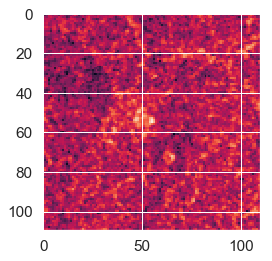

In [149]:
plt.imshow(example_image, resample=True)

In [23]:
# Let's take a look at examples of each image type, randomly.
class_name_index_dict = {0: 'Not Volcano', 1: 'Volcano'}
type_name_index_dict = {1: 'Definitely', 2: 'Probably', 3: 'Possibly', 4: 'Only pit visible'}

In [24]:
num_classes = 2
num_types = 4

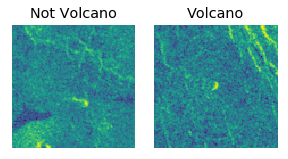

In [25]:
fig = plt.figure(figsize=(10,10))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = train_labels.loc[(train_labels['Volcano?'] == i)].index.values
    features = train_images.loc[idx]
    img_num = np.random.choice(idx)
    im = features.loc[img_num]
    ax.set_title(class_name_index_dict[i])
    plt.imshow(np.reshape(im.values, (110,110)))
plt.tight_layout()
plt.show()

In [26]:
# Make sure that the images labeled not volcano have type all missing
train_labels['Type'].loc[(train_labels['Volcano?'] == 0)].unique()

array([nan])

In [27]:
# Yep.  And we'll look at this for test also when we load it.

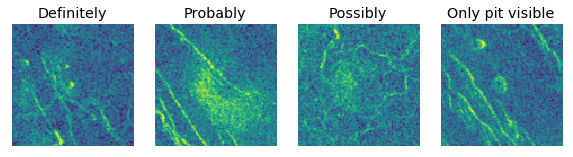

In [28]:
# Now let's look at some examples of the volcano types
fig = plt.figure(figsize=(10,10))
for i in range(num_types):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = train_labels.loc[((train_labels['Volcano?'] == 1) & (train_labels['Type'] == i+1))].index.values
    features = train_images.loc[idx]
    img_num = np.random.choice(idx)
    im = features.loc[img_num]
    ax.set_title(type_name_index_dict[i+1])
    plt.imshow(np.reshape(im.values, (110,110)))
plt.tight_layout()
plt.show()

In [29]:
# Right, so not entirely obvious from looking at these...

In [30]:
# So there are a some images with missing regions, indicated by zeros.  We'll ignore these for now.
# We also need to figure out what we are going to use as labels.  Do we want to predict volcano vs not volcano, or volcano types?
# There isn't a lot of data for some of the types. 

In [31]:
# Let's look at some more descriptive statistics for the types in the training and test sets.
# I want to be able to look at the distributions within the training and testing sets at the same time, so make a new labeled dataset
train_dist_df = train_labels.copy()
test_dist_df = test_labels.copy()

In [32]:
train_dist_df['source'] = 'train'
test_dist_df['source'] = 'test'

In [33]:
all_labels_df = pd.concat([train_dist_df, test_dist_df])

In [34]:
all_labels_df.head()

,Volcano?,Type,Radius,Number Volcanoes,source
0,1,3.0,17.46,1.0,train
1,0,NaN,NaN,NaN,train
2,0,NaN,NaN,NaN,train
3,0,NaN,NaN,NaN,train
4,0,NaN,NaN,NaN,train


In [35]:
all_labels_df.shape

(9734, 5)

In [36]:
train_labels.shape[0] + test_labels.shape[0]

9734

[Text(0,0,'Not volcano'), Text(0,0,'Volcano')]

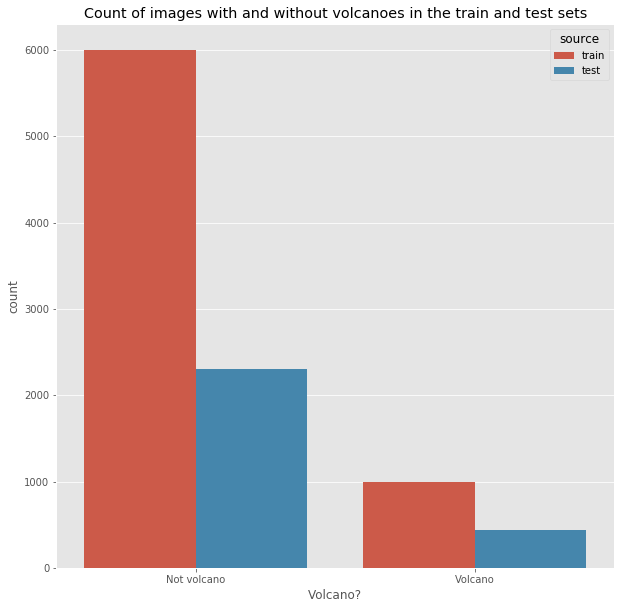

In [37]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
sns.countplot(data=all_labels_df, x='Volcano?', hue='source', ax=ax)
ax.set_title('Count of images with and without volcanoes in the train and test sets')
ax.set_xticklabels(['Not volcano', 'Volcano'])

[Text(0,0,'Definitely'),
 Text(0,0,'Probably'),
 Text(0,0,'Possibly'),
 Text(0,0,'Only pit visible')]

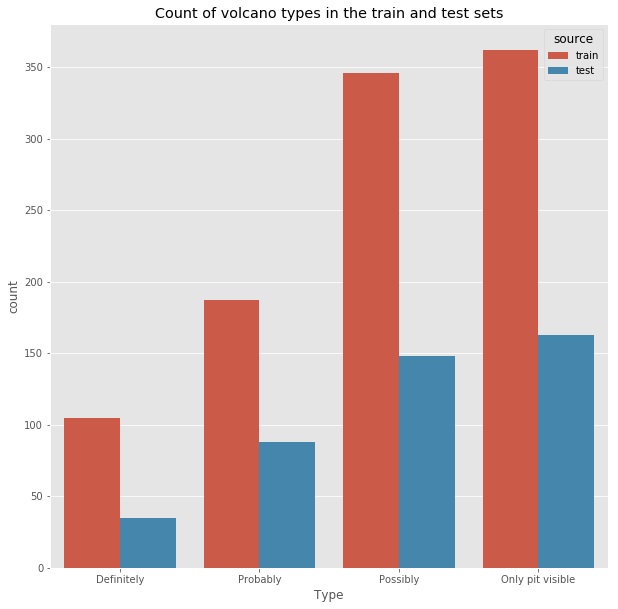

In [38]:
# So the relative percentage of volcanoes and not volcanoes is roughly the same between the train and test sets.
# Let's look at the type of volcanoes
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
sns.countplot(data=all_labels_df.loc[(all_labels_df['Volcano?'] == 1)], x='Type', hue='source', ax=ax)
ax.set_title('Count of volcano types in the train and test sets')
ax.set_xticklabels(['Definitely', 'Probably', 'Possibly', 'Only pit visible'])

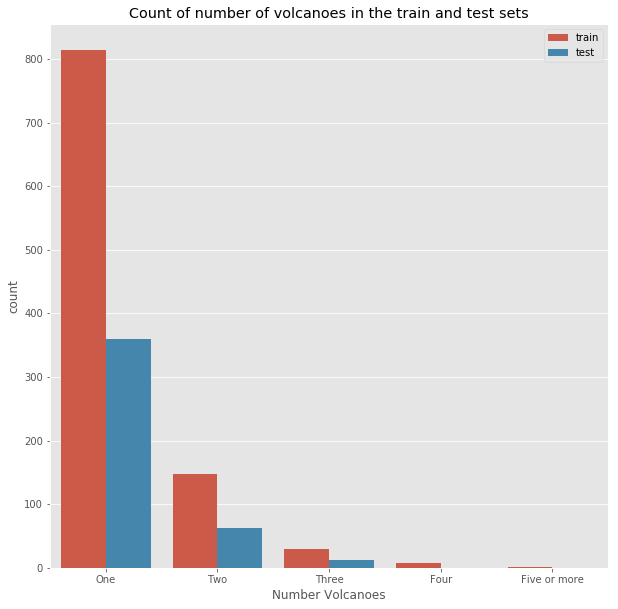

In [39]:
# Ok now let's look at the number of volcanoes in the images.
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
sns.countplot(data=all_labels_df.loc[(all_labels_df['Volcano?'] == 1)], x='Number Volcanoes', hue='source', ax=ax)
ax.set_title('Count of number of volcanoes in the train and test sets')
ax.set_xticklabels(['One', 'Two', 'Three', 'Four', 'Five or more'])
ax.legend(loc=1)

In [40]:
test_labels['Number Volcanoes'].value_counts()

1.0    359
2.0     63
3.0     12
Name: Number Volcanoes, dtype: int64

In [41]:
# So there are none of the 4 or the 5 or more category in the test set.
train_labels['Number Volcanoes'].value_counts()

1.0    814
2.0    147
3.0     30
4.0      7
5.0      2
Name: Number Volcanoes, dtype: int64

/Users/danielokeeffe/miniconda2/envs/basic_ml/lib/python2.7/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


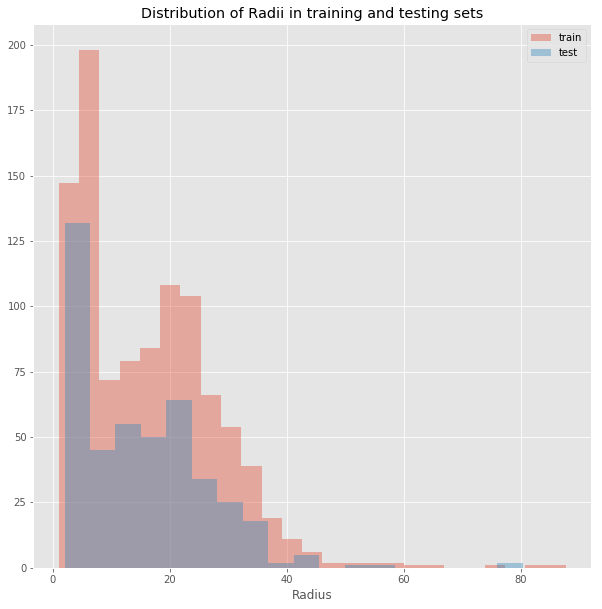

In [42]:
# Now let's look at the radii
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
sns.distplot(all_labels_df['Radius'].loc[((all_labels_df['Volcano?'] == 1) & (all_labels_df['source'] == 'train'))], kde=False, label='train')
sns.distplot(all_labels_df['Radius'].loc[((all_labels_df['Volcano?'] == 1) & (all_labels_df['source'] == 'test'))], kde=False, label='test')
ax.set_title('Distribution of Radii in training and testing sets')
ax.legend(loc=1)

In [43]:
# Ok so there are some of the "bigger" raidus volcanoes in both training and testing sets.

In [150]:
# Quantify the number of images with missing regions.
# I know by inspection that image index 3 is corrupted in the training set.
train_images.iloc[3].head()

0    0
1    0
2    0
3    0
4    0
Name: 3, dtype: int64

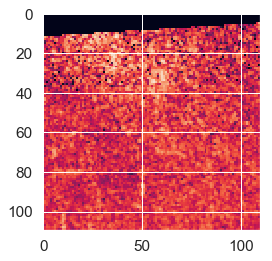

In [152]:
plt.imshow(np.reshape(train_images.iloc[3].values, (110, 110)), resample=True)

## Classifier
* We'll try a convolutional neural net here to classify the volcanoes
* We'll first try just volcano vs not volcano
* We'll then try out the different levels of confidence in the type
* Of course, this means that our ground truth is a bit sketchy, so we'll have to take performance with a grain of salt
* There is also an issue with images that have missing areas.  We'll try to first build a model with these errors included, and then see what the effect of removing them is.

In [44]:
def plot_model(model):
    return SVG(keras.utils.vis_utils.model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [45]:
def history_plot(history, validation=True, figsize_=(20,10)):
    """Plot network metric history for traning and validation sets"""
    df = pd.DataFrame(history.history)
    num_epochs = df.shape[0]
    
    # Set figure size option
    # plt.rcParams['figure.figsize'] = figsize_
    # Why do I need to reset this everytime?
    # plt.style.use('dark_background')
    plt.figure(figsize=figsize_)
    metrics_ = [x for x in df.columns.tolist() if 'val' not in x]
    num_metrics = len(metrics_)
    
    for i in range(0, num_metrics):
        plt.subplot(int(round(num_metrics/2)), 2, i+1)
        plt.plot(df[metrics_[i]].values, 'r')
        if validation:
            validation_metric = 'val_' + metrics_[i]
            plt.plot(df[validation_metric].values, 'g')
        plt.xticks(np.arange(0, num_epochs+1, 1.0))
        plt.xlabel("Num of Epochs")
        plt.ylabel(metrics_[i])
        plt.title("Training {0} vs Validation {1}".format(metrics_[i], metrics_[i]))
        plt.legend(['train','validation'])
    plt.tight_layout()
    plt.show()

In [46]:
def make_confusion_matrix(classifier_, x_test, y_test, figsize_=(20,10)):
    """Make a confusion matrix"""
    Y_pred = classifier_.predict(x_test)
    y_pred = np.argmax(Y_pred, axis=1)
    
    # Compute the confusion matrix and store as a DataFrame
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm)
    
    plt.figure(figsize=figsize_)
    # Set label font size
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='.1f')

In [47]:
def make_score_distribution(df, proba_cols, true_col, true_label, title=None, figsize=(10, 10)):
    """
    Makes a score distribution for examining the performance of a classifier.
    :param df: Dataframe containing the true labels, and predicted probabilities for each class
    :param proba_cols: A list of the column names in df which have the predicted probabilities
    :param true_col: A string which is the column name in df of the true labels
    :param true_label: The actual value of the true label (i.e. 1, 2, etc..)
    :param title: String, the title of plot.  Default is None.
    :param figsize: Optional: a tuple of integers for the figure size.
    :return: Nothing
    """
    # TODO: Test this for multi-class problems.
    fig, ax = plt.subplots(figsize=figsize)
    sns.distplot(df[proba_cols[0]].loc[(df[true_col] == true_label)], kde=False, ax=ax)
    if title:
        sns.distplot(df[proba_cols[1]].loc[(df[true_col] == true_label)], kde=False, ax=ax).set_title(title)
    else:
        sns.distplot(df[proba_cols[1]].loc[(df[true_col] == true_label)], kde=False, ax=ax)
    ax.set(xlabel='score', ylabel='count')
    plt.show()

In [48]:
def make_roc_curves_df(df, true_col, scores_col, figsize=(10, 10)):
    """
    Function for making nice-ish looking roc curves. Take a dataframe as in input instead of arrays.
    :param df: Dataframe with true labels and predicted scores
    :param true_col: String. Column name in the dataframe of the true labels
    :param scores_col: String. Column name in the dataframe of the predicted scores
    :param figsize: Optional: a tuple of intergers for the figure size
    :return: false positive rate, true positive rate, the corresponding threshold, and the auc score
    """
    fpr, tpr, threshold = roc_curve(y_true=df[true_col].values, y_score=df[scores_col].values)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=figsize)
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return fpr, tpr, threshold, roc_auc

In [49]:
conv = functools.partial(keras.layers.Conv2D, filters=50, kernel_size=3, strides=2, activation="relu", padding="same")

In [50]:
# We need to prep the image data.  We'll want to scale values to be between -1 and 1.
x_train = train_images.values
x_test = test_images.values

In [51]:
y_train = train_labels['Volcano?'].values
y_test = test_labels['Volcano?'].values

In [52]:
# The other values in the labels set look like target leaks, so we'll leave them out for now.
x_train = (2/(x_train.max()))*x_train - 1
x_test = (2/(x_test.max()))*x_test - 1

In [53]:
print('training set pixel values scaled to {0} and {1}').format(np.min(x_train), np.max(x_train))
print('\n')
print('testing set pixel values scaled to {0} and {1}').format(np.min(x_test), np.max(x_test))

training set pixel values scaled to -1.0 and 1.0


testing set pixel values scaled to -1.0 and 1.0


In [54]:
# We need to reshape the image values.
x_train.shape[1:]

(12100,)

In [55]:
x_train = [np.reshape(x, (110, 110, 1)) for x in x_train]

In [56]:
x_test = [np.reshape(x, (110, 110, 1)) for x in x_test]

In [57]:
x_train = np.array(x_train)

In [58]:
x_test = np.array(x_test)

In [59]:
x_train[0].shape

(110, 110, 1)

In [60]:
x_test[0].shape

(110, 110, 1)

In [61]:
# We need a validation set.
x_for_train = x_train[0:6000]
y_for_train = y_train[0:6000]
x_for_valid = x_train[6000::]
y_for_valid = y_train[6000::]

In [62]:
x_for_train.shape

(6000, 110, 110, 1)

In [63]:
x_for_valid.shape

(1000, 110, 110, 1)

In [101]:
# We'll use a simple sequential model
classifier_cnn = keras.Sequential()

In [102]:
# ok so this is the input dimensions.
classifier_cnn.add(keras.layers.InputLayer(input_shape=x_train.shape[1:]))

In [103]:
# add convolutional layers
classifier_cnn.add(conv())
classifier_cnn.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier_cnn.add(keras.layers.Dropout(rate=0.1))
classifier_cnn.add(conv())
classifier_cnn.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier_cnn.add(keras.layers.Dropout(rate=0.1))
classifier_cnn.add(conv())
classifier_cnn.add(keras.layers.Dropout(rate=0.1))

In [104]:
# Add a layer to flatten 
classifier_cnn.add(keras.layers.Flatten())

In [105]:
# Add a dense layer for the output with softmax activation
classifier_cnn.add(keras.layers.Dense(num_classes, activation="softmax"))

In [106]:
classifier_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 55, 55, 50)        500       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 50)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 27, 27, 50)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 50)        22550     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 50)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 50)          22550     
__________

In [107]:
# We can visualize the network architecture
sequential_model_to_ascii_printout(classifier_cnn)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    110  110    1
              Conv2D    \|/  -------------------       500     1.0%
                relu   #####     55   55   50
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     27   27   50
             Dropout    | || -------------------         0     0.0%
                       #####     27   27   50
              Conv2D    \|/  -------------------     22550    47.0%
                relu   #####     14   14   50
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####      7    7   50
             Dropout    | || -------------------         0     0.0%
                       #####      7    7   50
              Conv2D    \|/  -------------------     22550    47.0%
                relu   #####      4    4   50
             Dropout    | || -------------------         0     0.0%
              

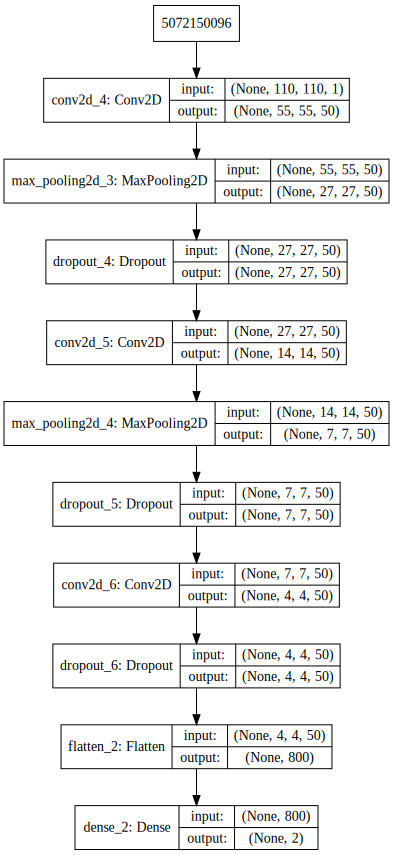

In [108]:
# Here's a nicer plot
plot_model(classifier_cnn)

In [109]:
# If we hot encode the target, we could use categorial_crossentropy
classifier_cnn.compile(optimizer=keras.optimizers.RMSprop(), loss="sparse_categorical_crossentropy", metrics=['acc'])

In [110]:
# Before fitting, define the history object for the callbacks.
history_cnn = History()

In [111]:
# Fit the model.
classifier_cnn.fit(x=x_for_train, y=y_for_train, validation_data=(x_for_valid, y_for_valid), epochs=10, callbacks=[history_cnn])

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.2949 - acc: 0.8937 - val_loss: 0.2045 - val_acc: 0.9250
Epoch 2/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.1946 - acc: 0.9325 - val_loss: 0.1892 - val_acc: 0.9230
Epoch 3/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.1717 - acc: 0.9433 - val_loss: 0.1480 - val_acc: 0.9480
Epoch 4/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.1529 - acc: 0.9467 - val_loss: 0.1578 - val_acc: 0.9410
Epoch 5/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.1384 - acc: 0.9530 - val_loss: 0.1339 - val_acc: 0.9570
Epoch 6/10
6000/6000 [==============================] - 13s 2ms/step - loss: 0.1277 - acc: 0.9568 - val_loss: 0.1370 - val_acc: 0.9540
Epoch 7/10
6000/6000 [==============================] - 13s 2ms/step - loss: 0.1218 - acc: 0.9585 - val_loss: 0.1589 - val_acc: 0.9400
Epoch 8

In [112]:
score_cnn = classifier_cnn.evaluate(x_test, y_test, verbose=0)

In [113]:
print('Test loss: {0}'.format(score_cnn[0]))

Test loss: 0.123686507164


In [114]:
print('Test accuracy: {0}'.format(score_cnn[1]))

Test accuracy: 0.959400146306


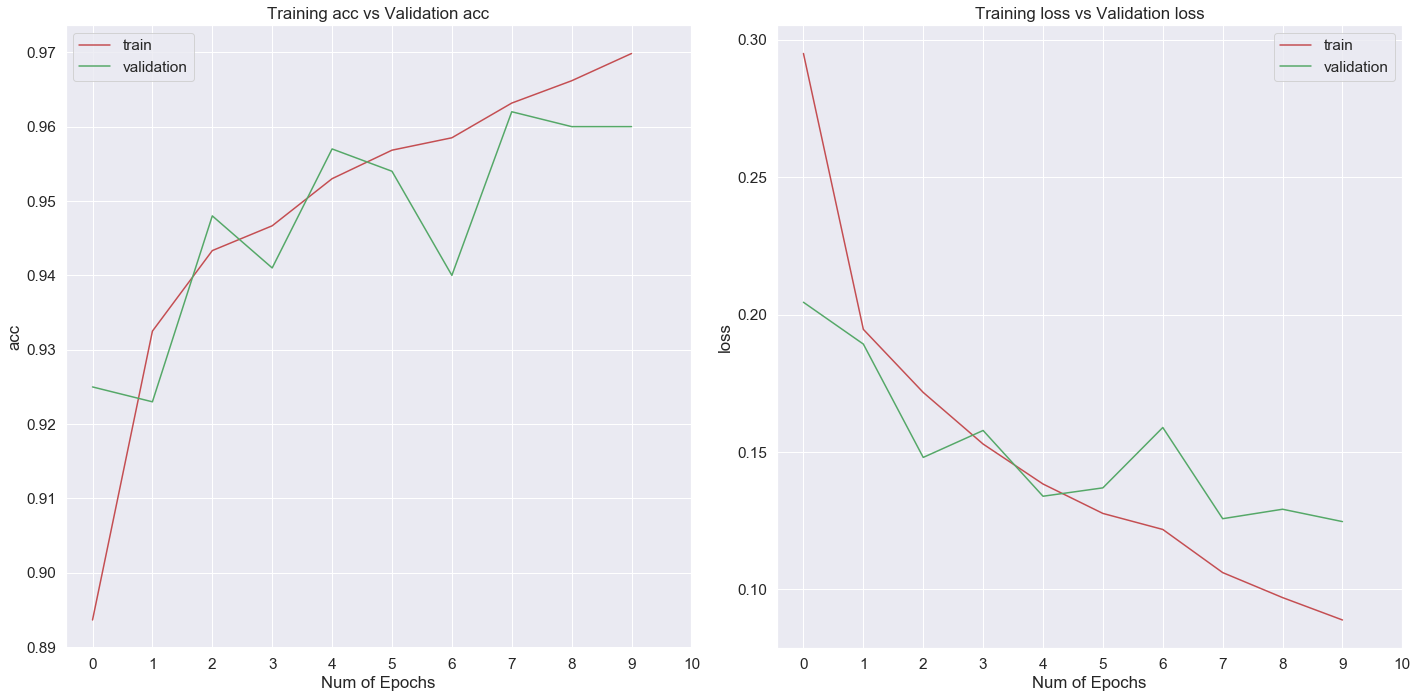

In [115]:
history_plot(history=history_cnn, validation=True, figsize_=(20,10))

In [116]:
cols_proba = ['probability_no_volcano', 'probability_volcano']

In [117]:
df1 = pd.DataFrame(classifier_cnn.predict_proba(x_test), columns=cols_proba)

In [118]:
pred_df = test_labels.copy()

In [119]:
pred_df = pd.concat([pred_df, df1], axis=1)

In [120]:
# test_labels.drop(['probability_no_volcano', 'probability_volcano', 'predicted_class_50_threshold'], axis=1, inplace=True)

In [121]:
pred_df.head()

,Volcano?,Type,Radius,Number Volcanoes,probability_no_volcano,probability_volcano
0,0,NaN,NaN,NaN,0.925955,0.074045
1,0,NaN,NaN,NaN,0.994542,0.005458
2,1,1.0,17.00,1.0,0.010557,0.989443
3,0,NaN,NaN,NaN,0.997023,0.002977
4,1,3.0,15.13,1.0,0.000021,0.999979


In [122]:
pred_df['predicted_class_50_threshold'] = classifier_cnn.predict_classes(x_test)

In [123]:
# Ok so how did we do? We want an roc curve, want to understand precision and recall here as well.
from sklearn.metrics import auc, roc_curve

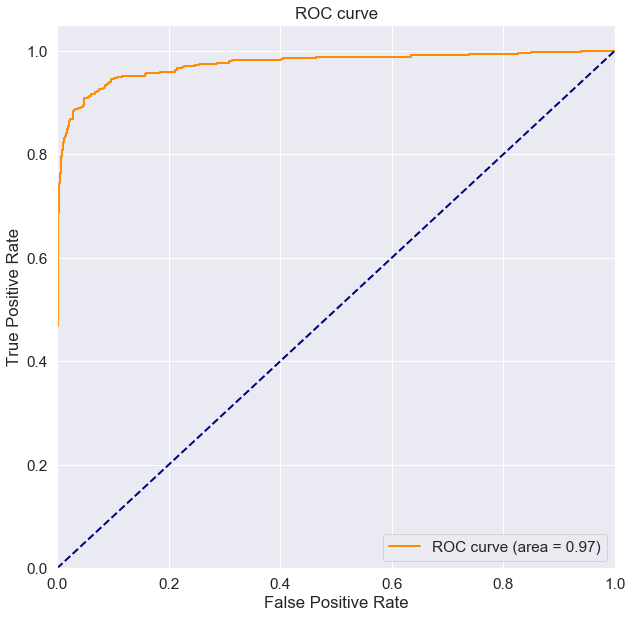

In [124]:
fpr, tpr, threshold, roc_auc = make_roc_curves_df(df=pred_df, true_col='Volcano?', scores_col='probability_volcano', figsize=(10, 10))

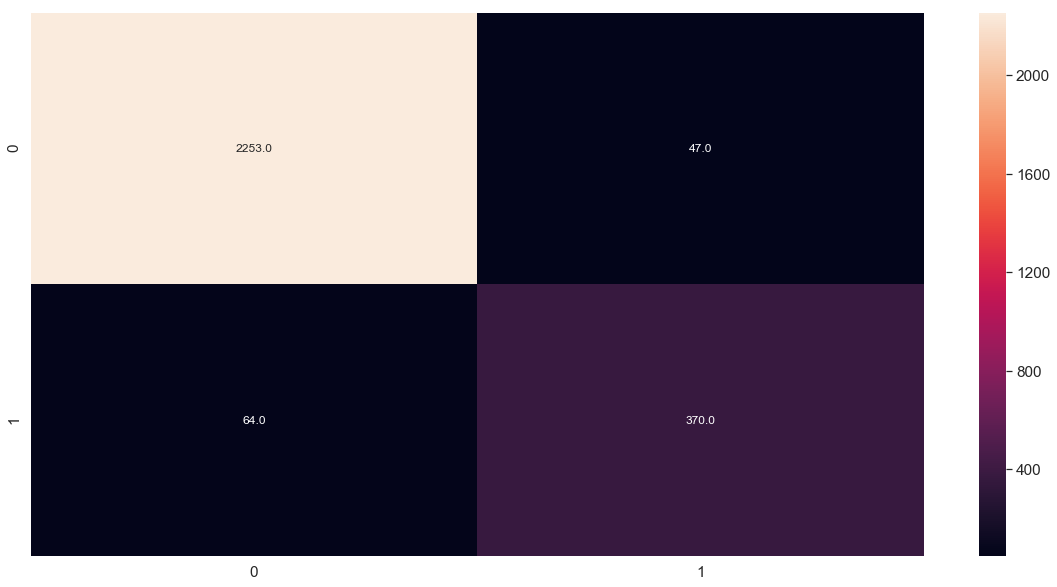

In [125]:
make_confusion_matrix(classifier_=classifier_cnn, x_test=x_test, y_test=y_test)

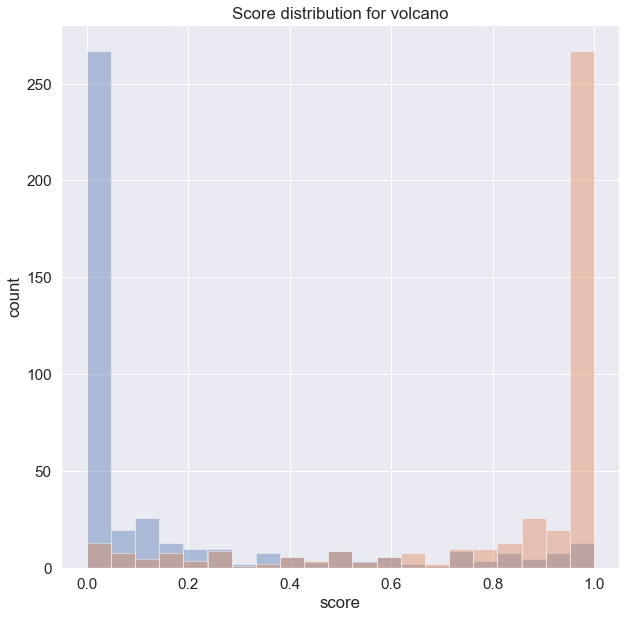

In [126]:
# Hmm...ok so that's interesting.  There are a lot of volcanos that we are predicting as not volcano.  
make_score_distribution(df=pred_df, 
                        proba_cols=['probability_no_volcano', 'probability_volcano'], 
                        true_col='Volcano?', 
                        true_label=1, 
                        title='Score distribution for volcano')

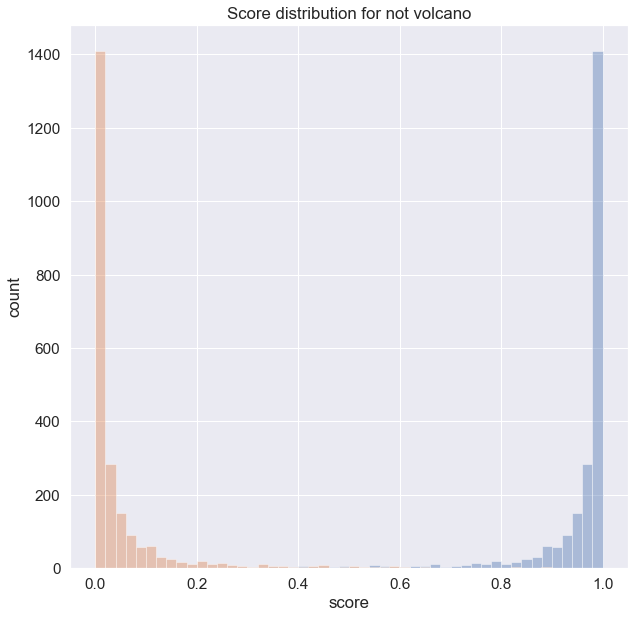

In [127]:
make_score_distribution(df=pred_df, 
                        proba_cols=['probability_no_volcano', 'probability_volcano'], 
                        true_col='Volcano?', 
                        true_label=0, 
                        title='Score distribution for not volcano')

In [128]:
# Much better.  What are the mislabeled precentages on the test set?
pred_df.head()

,Volcano?,Type,Radius,Number Volcanoes,probability_no_volcano,probability_volcano,predicted_class_50_threshold
0,0,NaN,NaN,NaN,0.925955,0.074045,0
1,0,NaN,NaN,NaN,0.994542,0.005458,0
2,1,1.0,17.00,1.0,0.010557,0.989443,1
3,0,NaN,NaN,NaN,0.997023,0.002977,0
4,1,3.0,15.13,1.0,0.000021,0.999979,1


In [129]:
percent_vol = (pred_df.loc[((pred_df['predicted_class_50_threshold'] == 1) & (pred_df['Volcano?'] == 1))].shape[0]) / (pred_df.loc[(pred_df['Volcano?'] == 1)].shape[0])*100
percent_not_vol = (pred_df.loc[((pred_df['predicted_class_50_threshold'] == 0) & (pred_df['Volcano?'] == 0))].shape[0]) / (pred_df.loc[(pred_df['Volcano?'] == 0)].shape[0])*100

In [130]:
print('Percentage of volcanoes correctly predicted: {0}'.format(percent_vol))
print('\n')
print('Percentage of not volcanoes correctly predicted: {0}'.format(percent_not_vol))

Percentage of volcanoes correctly predicted: 85.2534562212


Percentage of not volcanoes correctly predicted: 97.9565217391
